In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.ticker as mtick

np.random.seed( 42 )

def rev_function( x, a, b ):
    ## cumulative revenue is a logarithmic growth function
    return a * np.log( x + 1 ) + b

def add_noise( val, sensitivity ):
    noise = np.random.normal( 0, sensitivity )
    return val + noise

def create_user( x, a_true = None, b_true = None ):
    month = np.random.choice( [ 'January', 'February' ] )
    if a_true is not None and b_true is not None:
        a_noised = add_noise( a_true, 1 )
        b_noised = add_noise( b_true, 0.25 )
        noised_revenue = [ rev_function( x_val, a_noised, b_noised ) for x_val in x ]
    else:
        noised_revenue = [ 0 ] * 60
    return [ month ] + noised_revenue

paying_users = 100
non_paying_users = int( 100 / 0.05 )
num_days = 60
x = np.arange( 1, num_days + 1 )

## true cumulative revenue function parameters
a_true, b_true = 4, 5

cols = [ 'month' ] + list( x )
paying_users_df = pd.DataFrame( columns=cols )
non_paying_users_df = pd.DataFrame( columns=cols )

for i in range( paying_users ):
    this_user = create_user( x, a_true, b_true )
    paying_users_df.loc[ len( paying_users_df ) ] = this_user

for i in range( non_paying_users ):
    this_user = create_user( x )
    non_paying_users_df.loc[ len( non_paying_users_df ) ] = this_user

users_df = pd.concat( [ paying_users_df, non_paying_users_df ] )

display( users_df.head() )

users_df.loc[ :, 60 ].describe()

,month,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,January,7.520054,8.918813,9.911249,10.681042,11.310008,11.841792,12.302444,12.708768,13.072237,...,18.759723,18.825434,18.889918,18.953218,19.015378,19.076437,19.136435,19.195406,19.253387,19.310409
1,February,7.081618,8.252650,9.083510,9.727975,10.254542,10.699747,11.085402,11.425574,11.729867,...,16.491391,16.546405,16.600390,16.653384,16.705424,16.756542,16.806772,16.856143,16.904683,16.952422
2,January,7.474795,9.058290,10.181798,11.053258,11.765293,12.367310,12.888800,13.348788,13.760260,...,20.198897,20.273288,20.346287,20.417948,20.488317,20.557440,20.625362,20.692122,20.757760,20.822313
3,January,9.059074,11.321250,12.926290,14.171255,15.188466,16.048506,16.793506,17.450642,18.038471,...,27.236688,27.342962,27.447250,27.549623,27.650152,27.748902,27.845934,27.941308,28.035078,28.127299
4,February,7.788045,9.442274,10.615969,11.526357,12.270198,12.899107,13.443893,13.924428,14.354281,...,21.080531,21.158244,21.234505,21.309366,21.382879,21.455090,21.526045,21.595788,21.664358,21.731795


count    2100.000000
mean        1.015680
std         4.649915
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.076482
Name: 60, dtype: float64

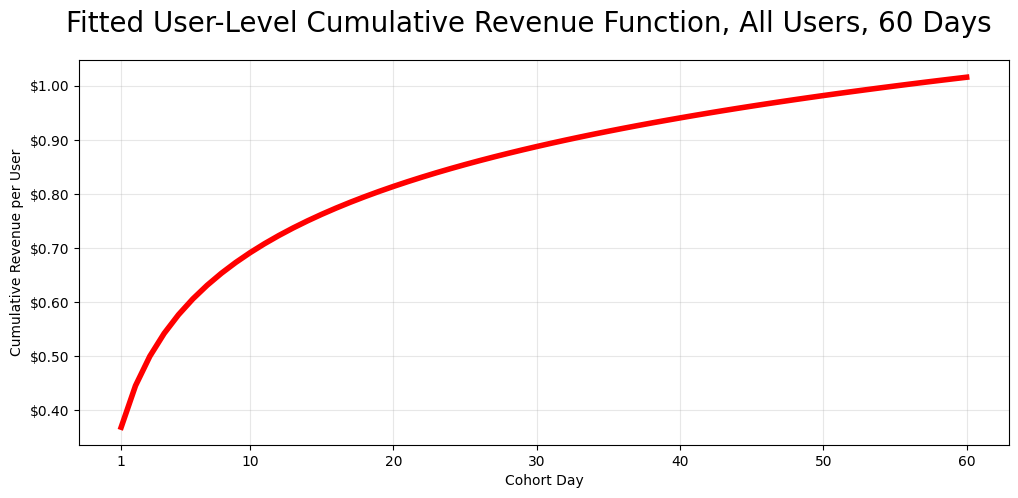

In [31]:
x_data = np.concatenate( [ x ] * len( users_df ) )
y_data = users_df[ x ].values.flatten()
popt, pcov = curve_fit( rev_function, x_data, y_data )

## plot violin plus fitted values

fig, ax = plt.subplots( 1, 1, figsize=( 12, 5 ) )
fitted_values = [ rev_function( x_val, *popt ) for x_val in x ]

ax.plot( x, fitted_values, linewidth=4, color='red', linestyle='solid')

ax.grid( alpha=0.3 )
ax.set_xticks( [ x_val for x_val in x if x_val in [ 1, 60 ] or x_val % 10 == 0  ] )

y_tick = mtick.StrMethodFormatter( '${x:,.2f}' )
ax.yaxis.set_major_formatter( y_tick )

ax.set_xlabel( "Cohort Day" )
ax.set_ylabel( "Cumulative Revenue per User" )

plt.suptitle( "Fitted User-Level Cumulative Revenue Function, All Users, 60 Days", fontsize=20 )

plt.show()

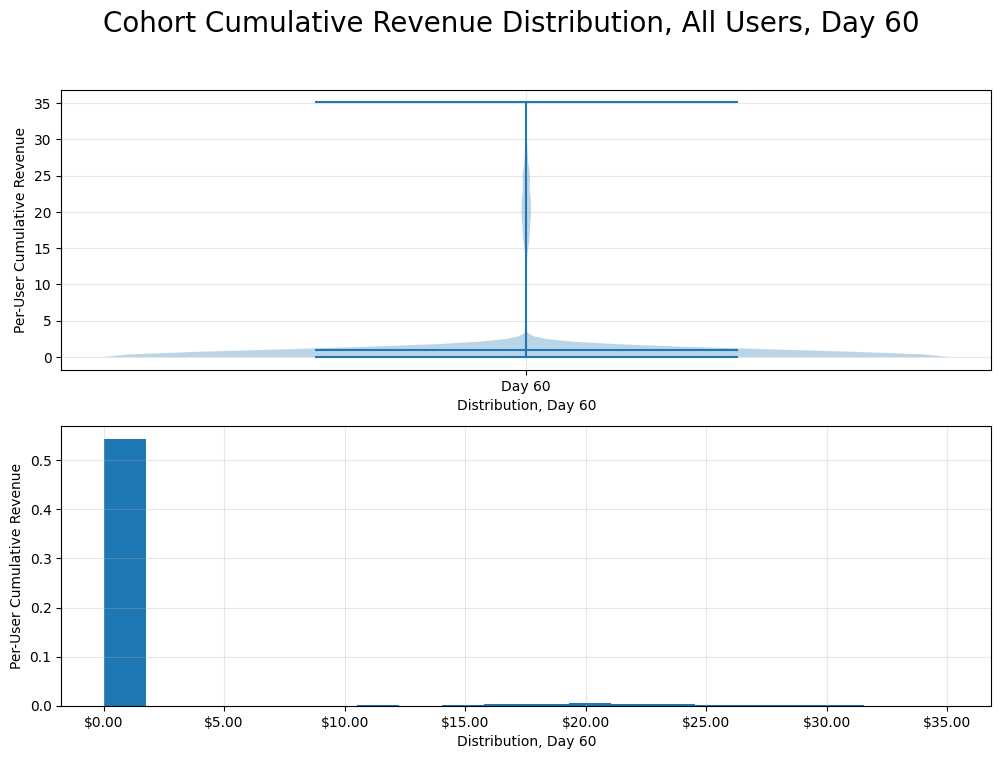

<Figure size 640x480 with 0 Axes>

In [32]:
fig, axes = plt.subplots( 2, 1, figsize=( 12, 8 ) )

## violin plot
axes[ 0 ].violinplot( users_df.loc[ :, 60 ],
                  showmeans=True,
                  showmedians=False )

axes[ 0 ].grid( alpha=0.3 )

y_tick = mtick.StrMethodFormatter( '${x:,.2f}' )
ax.yaxis.set_major_formatter( y_tick )

axes[ 0 ].set_xlabel( "Distribution, Day 60" )
axes[ 0 ].set_ylabel( "Per-User Cumulative Revenue" )

axes[ 0 ].set_xticks( [ 1 ] )
axes[ 0 ].set_xticklabels( [ "Day 60" ] )

## histogram
axes[ 1 ].hist( users_df.loc[ :, 60 ], density=True, bins=20 )
axes[ 1 ].grid( alpha=0.3 )

x_tick = mtick.StrMethodFormatter( '${x:,.2f}' )
axes[ 1 ].xaxis.set_major_formatter( x_tick )

axes[ 1 ].set_xlabel( "Distribution, Day 60" )
axes[ 1 ].set_ylabel( "Per-User Cumulative Revenue" )

plt.suptitle( "Cohort Cumulative Revenue Distribution, All Users, Day 60", fontsize=20 )

plt.show()
plt.tight_layout()

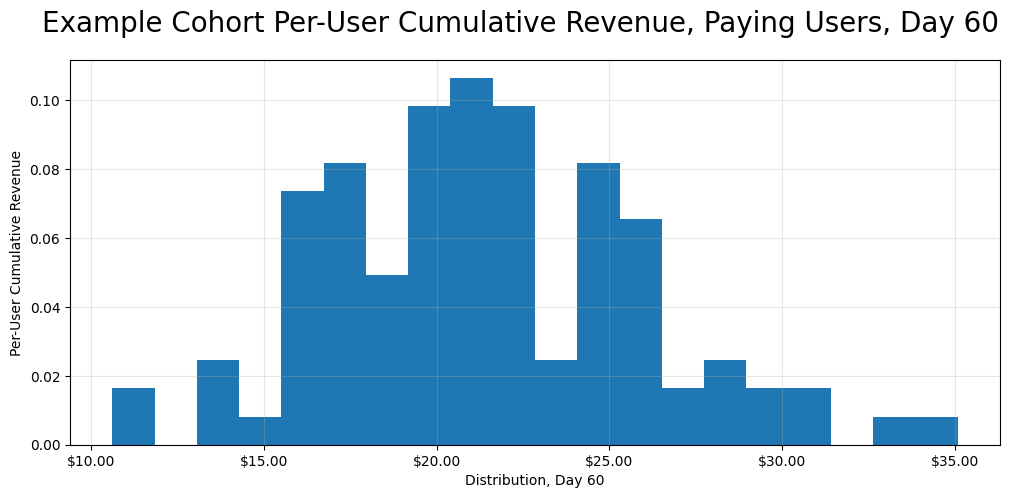

In [35]:
###

fig, ax = plt.subplots( 1, 1, figsize=( 12, 5 ) )

ax.hist( paying_users_df.loc[ :, 60 ], density=True, bins=20 )

ax.grid( alpha=0.3 )

x_tick = mtick.StrMethodFormatter( '${x:,.2f}' )
ax.xaxis.set_major_formatter( x_tick )

ax.set_xlabel( "Distribution, Day 60" )
ax.set_ylabel( "Per-User Cumulative Revenue" )

plt.suptitle( "Example Cohort Per-User Cumulative Revenue, Paying Users, Day 60", fontsize=20 )

plt.show()

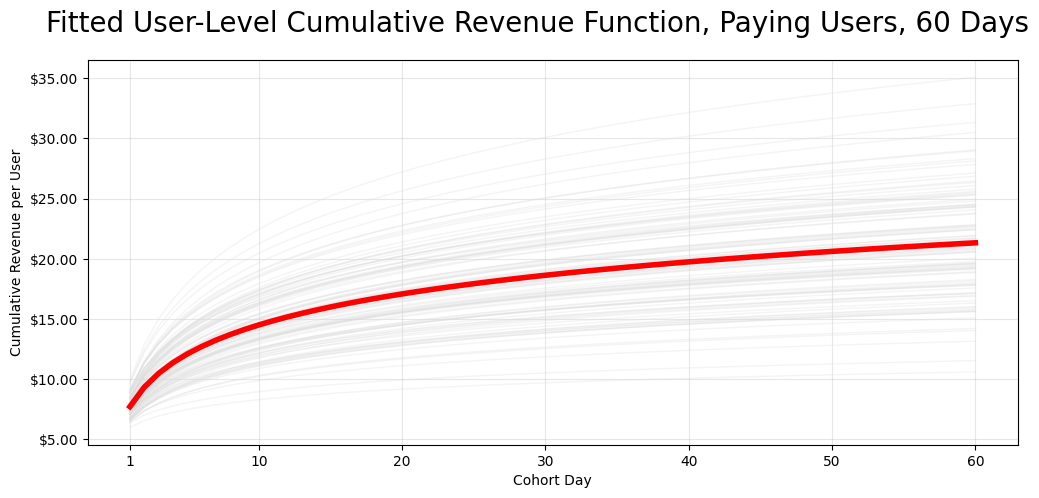

In [36]:
x_data = np.concatenate( [ x ] * len( non_zero_users ) )
y_data = paying_users_df[ x ].values.flatten()
popt, pcov = curve_fit( rev_function, x_data, y_data )

fitted_values = [ rev_function( x_val, *popt ) for x_val in x ]

## plot violin plus fitted values

fig, ax = plt.subplots( 1, 1, figsize=( 12, 5 ) )

for i, row in paying_users_df.iterrows():
    ax.plot( x, row[ x ], linewidth=1, color='gainsboro', alpha=0.3 )

ax.plot( x, fitted_values, linewidth=4, color='red', linestyle='solid' )

ax.grid( alpha=0.3 )
ax.set_xticks( [ x_val for x_val in x if x_val in [ 1, 60 ] or x_val % 10 == 0  ] )

y_tick = mtick.StrMethodFormatter( '${x:,.2f}' )
ax.yaxis.set_major_formatter( y_tick )

ax.set_xlabel( "Cohort Day" )
ax.set_ylabel( "Cumulative Revenue per User" )

plt.suptitle( "Fitted User-Level Cumulative Revenue Function, Paying Users, 60 Days", fontsize=20 )

plt.show()

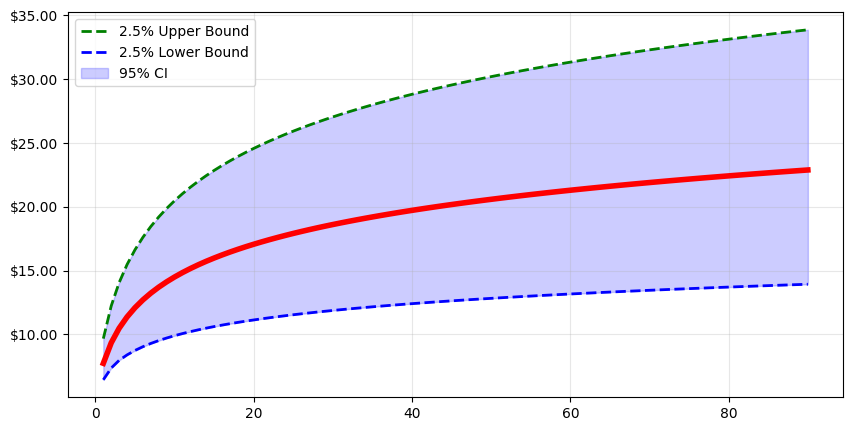

In [55]:
projection_endpoint = 90

## create the projection dataframe
x_projected = np.arange( 1, projection_endpoint + 1 )
paying_users_bootstrap_projected_df = pd.DataFrame( columns=[ 'month' ] + list( x_projected ) )

## bootstrap the nonzero dataset 10x
paying_users_bootstrap_df = paying_users_df.sample( frac=10, replace=True )

for i, row in paying_users_bootstrap_df.iterrows():
    ## run the curve fit on this row
    x_data = x
    y_data = row[ x ]
    popt, pcov = curve_fit( rev_function, x_data, y_data )
    ## create the user's projection
    fitted_values = [ rev_function( x_val, *popt ) for x_val in x_projected ]
    ## add to the projection df
    paying_users_bootstrap_projected_df.loc[ len( paying_users_bootstrap_projected_df ) ] = \
        [ row[ 'month' ] ] + fitted_values
    ## plot the user's projection
    ax.plot( x_projected, fitted_values, color='gainsboro', alpha=0.1 )

## create the plot
fig, ax = plt.subplots( 1, 1, figsize=( 10, 5 ) )

## mean of the projections
paid_users_projection_mean = paying_users_bootstrap_projected_df[ x_projected ].mean()
ax.plot( x_projected, paid_users_projection_mean, color='red', linewidth=4 )

## CI
lower_bound = paying_users_bootstrap_projected_df[ x_projected ].quantile( 0.025 )
upper_bound = paying_users_bootstrap_projected_df[ x_projected ].quantile( 0.975 )
ax.plot( x_projected, upper_bound, linestyle='--', linewidth=2, color='green', \
    label='2.5% Upper Bound')
ax.plot( x_projected, lower_bound, linestyle='--', linewidth=2, color='blue', \
    label='2.5% Lower Bound')
ax.fill_between( x_projected, lower_bound, upper_bound, color='blue', alpha=0.2, label='95% CI' )

y_tick = mtick.StrMethodFormatter( '${x:,.2f}' )
ax.yaxis.set_major_formatter( y_tick )

ax.legend()

ax.grid( alpha=0.3 )
plt.show()


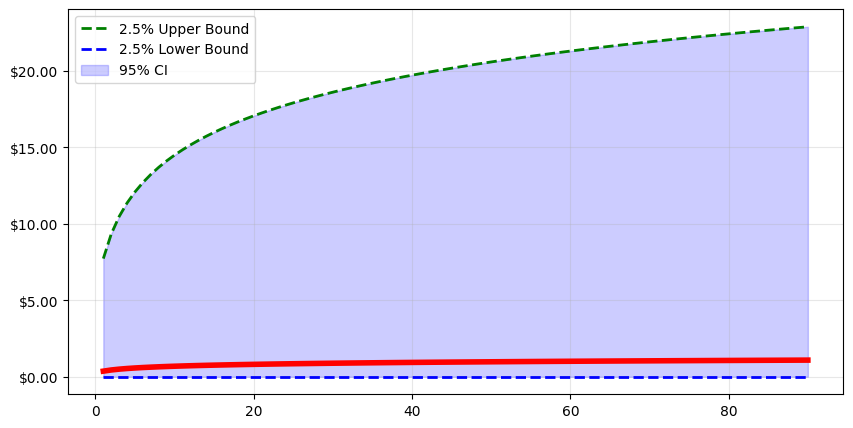

In [61]:
## combine the paid user projections back into the overall mix
users_projection_df = pd.DataFrame( columns = paying_users_bootstrap_projected_df.columns )
non_paying_users_projection_df = pd.DataFrame( columns = paying_users_bootstrap_projected_df.columns )
non_paying_users_projection_df[ 'month' ] = non_paying_users_df[ 'month' ]
non_paying_users_projection_df.iloc[ 0:, 1: ] = 0

paying_users_projected_df = pd.DataFrame( columns = paying_users_bootstrap_projected_df.columns )
paying_users_projected_df[ 'month' ] = paying_users_df[ 'month' ]
paying_users_projected_df.iloc[ 0:, 1: ] = paid_users_projection_mean

users_projection_df = pd.concat( [ paying_users_projected_df, non_paying_users_projection_df ] )

## create the plot
fig, ax = plt.subplots( 1, 1, figsize=( 10, 5 ) )

## mean of the projections
overall_mean_projection = users_projection_df[ x_projected ].mean()

ax.plot( x_projected, overall_mean_projection, color='red', linewidth=4 )

## CI
lower_bound = pd.to_numeric( users_projection_df[ x_projected ].quantile( 0.025 ) )
upper_bound = pd.to_numeric( users_projection_df[ x_projected ].quantile( 0.975 ) )
ax.plot( x_projected, upper_bound, linestyle='--', linewidth=2, color='green', \
    label='2.5% Upper Bound')
ax.plot( x_projected, lower_bound, linestyle='--', linewidth=2, color='blue', \
    label='2.5% Lower Bound')
ax.fill_between( x_projected, lower_bound, upper_bound, color='blue', alpha=0.2, label='95% CI' )

y_tick = mtick.StrMethodFormatter( '${x:,.2f}' )
ax.yaxis.set_major_formatter( y_tick )

ax.legend()

ax.grid( alpha=0.3 )
plt.show()

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
[1 2 3 4 5]
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: 0.025, dtype: object
1     7.726403
2     9.335904
3    10.477863
4    11.363635
5    12.087364
Name: 0.975, dtype: object


In [ ]:
## SPLIT OUT JAN AND FEB

projection_endpoint = 90

## create the projection dataframe
x_projected = np.arange( 1, projection_endpoint + 1 )
paying_users_bootstrap_projected_df = pd.DataFrame( columns=[ 'month' ] + list( x_projected ) )

## create the plot
fig, ax = plt.subplots( 1, 1, figsize=( 10, 5 ) )

## bootstrap the nonzero dataset 10x
paying_users_bootstrap_df = paying_users_df.sample( frac=10, replace=True )

for i, row in paying_users_bootstrap_df.iterrows():
    ## run the curve fit on this row
    x_data = x
    y_data = row[ x ]
    popt, pcov = curve_fit( rev_function, x_data, y_data )
    ## create the user's projection
    fitted_values = [ rev_function( x_val, *popt ) for x_val in x_projected ]
    ## add to the projection df
    paying_users_bootstrap_projected_df.loc[ len( paying_users_bootstrap_projected_df ) ] = \
        [ row[ 'month' ] ] + fitted_values
    ## plot the user's projection
    ax.plot( x_projected, fitted_values, color='gainsboro', alpha=0.1 )

## mean of the projections
mean_projection = paying_users_bootstrap_projected_df[ x_projected ].mean()
ax.plot( x_projected, mean_projection, color='red', linewidth=4 )

## CI
lower_bound = paying_users_bootstrap_projected_df[ x_projected ].quantile( 0.025 )
upper_bound = paying_users_bootstrap_projected_df[ x_projected ].quantile( 0.975 )
ax.plot( x_projected, upper_bound, linestyle='--', linewidth=2, color='green', \
    label='2.5% Upper Bound')
ax.plot( x_projected, lower_bound, linestyle='--', linewidth=2, color='blue', \
    label='2.5% Lower Bound')
ax.fill_between( x_projected, lower_bound, upper_bound, color='blue', alpha=0.2, label='95% CI' )

y_tick = mtick.StrMethodFormatter( '${x:,.2f}' )
ax.yaxis.set_major_formatter( y_tick )

ax.legend()

ax.grid( alpha=0.3 )
plt.show()
